In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
C_filepath = "XYZ_heisenberg/C_array_MF.csv"
SvN_filepath = "XYZ_heisenberg/SvN_array_MF.csv"

df_C = pd.read_csv(C_filepath)
df_SvN = pd.read_csv(SvN_filepath)

In [3]:
R = 70
N = 201
times = df_C["times"].to_numpy()
chi = df_C["chi"].to_numpy()
SvN = df_SvN.to_numpy() #MAY HAVE TO TRANSPOSE THIS
C_r_t_5 = df_C["C_5"].to_numpy()
C_r_t_10 = df_C["C_10"].to_numpy()
C_r_t_20 = df_C["C_20"].to_numpy()
C_r_t_30 = df_C["C_30"].to_numpy()
C_r_t_40 = df_C["C_40"].to_numpy()
C_r_t_50 = df_C["C_50"].to_numpy()
C_r_t_60 = df_C["C_60"].to_numpy()
C_r_t_70 = df_C["C_70"].to_numpy()
C_r_t_80 = df_C["C_80"].to_numpy()
C_r_t_90 = df_C["C_90"].to_numpy()


In [4]:
start_index = np.where(np.logical_and(times>225.0, times<225.05))
start_index = int(start_index[0])

stop_index = np.where(np.logical_and(times>250.0, times<250.05))
stop_index = int(stop_index[0])


C:\Users\rache\AppData\Local\Temp\ipykernel_26900\3410303904.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_index = int(start_index[0])
C:\Users\rache\AppData\Local\Temp\ipykernel_26900\3410303904.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stop_index = int(stop_index[0])


In [5]:
time_data = np.real(times[start_index:stop_index])
C_data = np.real(C_r_t_70[start_index:stop_index])

In [6]:
def C_early(t,lambda_p,p,v_B,r=R):
    return -lambda_p * ((r/v_B - t)**(1+p))/(t**p)

In [10]:
guess = [1.0, 1.0, 1.0]

popt, pcov = curve_fit(C_early, time_data, C_data, p0=guess)

popt

C:\Users\rache\AppData\Local\Temp\ipykernel_26900\3291891944.py:2: RuntimeWarning: invalid value encountered in power
  return -lambda_p * ((r/v_B - t)**(1+p))/(t**p)
c:\Users\rache\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([nan, nan, nan])

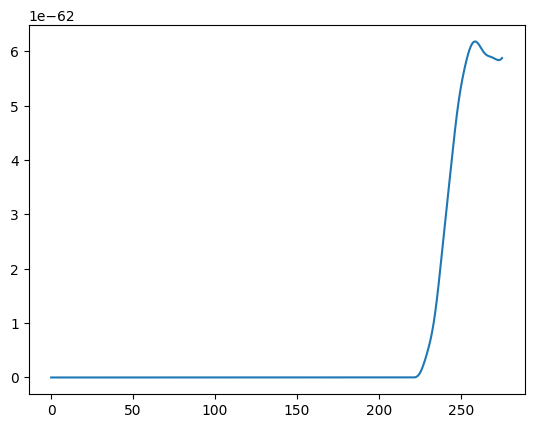

In [8]:
plt.plot(times,C_r_t_70)